## Experiment and anlyse some features creation

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
import seaborn as sns

# Set random
np.random.seed(42)

In [3]:
import sys
sys.path.append('../')

from prediction import (datareader, complete_data, cleanup, bikes_probability,
                        time_resampling)

/home/gillesa/anaconda2/envs/python3DS/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
%load_ext watermark

In [5]:
%watermark -d -v -p numpy,pandas,matplotlib -g -m -w

2018-02-13 

CPython 3.5.3
IPython 6.1.0

numpy 1.13.1
pandas 0.20.3
matplotlib 2.0.2

compiler   : GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
system     : Linux
release    : 3.13.0-74-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
Git hash   : 89509c6352e970c25067640ba561733a8ed7a05f
watermark 1.6.0


In [6]:
def plot_features_station(result, station, features_to_plot='paa', nb_row=350, draw_type='-'):
    """Plot available bikes and bike stands for a given station"""
    
    data = result[result.station == station].tail(nb_row).copy()
    
    fig, ax = plt.subplots(figsize=(18,5))
    plt.plot(data.index, data.probability, draw_type, label='probability', alpha=0.8)
    plt.plot(data.index, data[features_to_plot], draw_type, label=features_to_plot, alpha=0.6)
    
    
    ax = plt.gca()
    # set major ticks location every day
    ax.xaxis.set_major_locator(mdates.DayLocator())
    # set major ticks format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('\n\n\n%a %d.%m.%Y'))
    # set minor ticks location every one hours
    ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
    # set minor ticks format
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
    plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)

    plt.legend(loc='best')

In [7]:
def plot_features_station_train_test(train, test, station, features_to_plot='paa', nb_row=350, draw_type='-'):
    """Plot available bikes and bike stands for a given station for a train / test dataset"""
    
    train = train[train.station == station].tail(nb_row).copy()
    test = test[test.station == station].copy()
    
    
    fig, ax = plt.subplots(figsize=(18,5))
    plt.plot(train.index, train.probability, draw_type, label=' Train probability', alpha=0.8)
    plt.plot(train.index, train[features_to_plot], draw_type, label='Train ' + features_to_plot, alpha=0.6)
    
    plt.plot(test.index, test.probability, draw_type, label=' Test probability', alpha=0.8)
    plt.plot(test.index, test[features_to_plot], draw_type, label='Test ' + features_to_plot, alpha=0.6)
    
    
    ax = plt.gca()
    # set major ticks location every day
    ax.xaxis.set_major_locator(mdates.DayLocator())
    # set major ticks format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('\n\n\n%a %d.%m.%Y'))
    # set minor ticks location every one hours
    ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
    # set minor ticks format
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
    plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)

    plt.legend(loc='best')

### Read and prepare the data

In [8]:
DATAFILE = '../data/lyon.csv'

In [9]:
raw = datareader(DATAFILE)

2018-02-13 14:45:16,098 [30261] INFO     prediction: read the file '../data/lyon.csv'


#### Cleaning dataset

In [10]:
df_clean = cleanup(raw)

2018-02-13 14:45:23,773 [30261] INFO     prediction: cleanup processing


In [11]:
df_clean.head()

,station,ts,stands,bikes,bonus,status
0,10063,2017-07-08 23:49:09,10,23,Non,OPEN
2,8038,2017-07-08 23:49:26,6,14,Non,OPEN
3,7045,2017-07-08 23:52:43,13,7,Non,OPEN
4,6045,2017-07-08 23:52:14,7,8,Non,OPEN
5,7062,2017-07-08 23:57:27,5,11,Non,OPEN


#### Create dataset for learning 

In [12]:
df = (df_clean.pipe(time_resampling)
      .pipe(complete_data)
      .pipe(bikes_probability))

2018-02-13 14:45:25,700 [30261] INFO     prediction: Time resampling for each station by '10T'
2018-02-13 14:45:28,083 [30261] INFO     prediction: complete some data
2018-02-13 14:45:58,575 [30261] INFO     prediction: bikes probability


In [13]:
df.head()

,station,ts,bikes,stands,is_open,day,hour,minute,probability
0,1001,2017-07-09 00:00:00,15.0,1.0,1.0,6,0,0,0.93750
1,1001,2017-07-09 00:10:00,15.0,1.0,1.0,6,0,10,0.93750
2,1001,2017-07-09 00:20:00,14.5,1.5,1.0,6,0,20,0.90625
3,1001,2017-07-09 00:30:00,14.5,1.5,1.0,6,0,30,0.90625
4,1001,2017-07-09 00:40:00,11.5,4.5,1.0,6,0,40,0.71875


In [14]:
df.shape

(3880901, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880901 entries, 0 to 3880900
Data columns (total 9 columns):
station        int64
ts             datetime64[ns]
bikes          float64
stands         float64
is_open        float64
day            int64
hour           int64
minute         int64
probability    float64
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 266.5 MB


#### Create Target learning & analyse mechanics

In [16]:
# params of learning dataset creation
start = pd.Timestamp("2017-08-01T02:00:00") # Tuesday
predict_date = pd.Timestamp("2017-09-22T09:00:00") # wednesday
# predict the next 30 minutes
freq = '1H'
# number of predictions at 'predict_date'.
# Here, the next 30 minutes and the next hour (30 minutes + 30 minutes).
# If you want to predict the next 3 hours, every 30 minutes, thus set periods=6
periods = 1

## Here we don't care about DataFrame Sort (timeserie). We only do some matching and ratio

#### get_summer_holiday

Create a bool (0 classic day / 1 holidays)

In [17]:
from prediction import get_summer_holiday

In [18]:
df = get_summer_holiday(df.copy())

In [19]:
df.head(2)

,station,ts,bikes,stands,is_open,day,hour,minute,probability,is_holiday
0,1001,2017-07-09 00:00:00,15.0,1.0,1.0,6,0,0,0.9375,1
1,1001,2017-07-09 00:10:00,15.0,1.0,1.0,6,0,10,0.9375,1


In [20]:
df.tail(2)

,station,ts,bikes,stands,is_open,day,hour,minute,probability,is_holiday
3880899,12002,2017-09-26 14:40:00,2.0,18.0,1.0,1,14,40,0.1,0
3880900,12002,2017-09-26 14:50:00,2.0,18.0,1.0,1,14,50,0.1,0


#### get_public_holiday

Count day before and after special holiday (like assomption on 15/08)

In [21]:
from prediction import get_public_holiday

In [22]:
df = get_public_holiday(df.copy(), count_day=5)

2018-02-13 14:46:21,528 [30261] INFO     prediction: compute delta with  public holiday on '5' days


In [23]:
df[df.ts >='2017-08-14 23:50:00'].head()

,station,ts,bikes,stands,is_open,day,hour,minute,probability,is_holiday,public_holiday,public_holiday_count
5327,1001,2017-08-14 23:50:00,15.0,1.0,1.0,0,23,50,0.9375,1,0,1.0
5328,1001,2017-08-15 00:00:00,15.0,1.0,1.0,1,0,0,0.9375,1,1,0.0
5329,1001,2017-08-15 00:10:00,14.0,2.0,1.0,1,0,10,0.8750,1,1,0.0
5330,1001,2017-08-15 00:20:00,15.0,1.0,1.0,1,0,20,0.9375,1,1,0.0
5331,1001,2017-08-15 00:30:00,15.0,1.0,1.0,1,0,30,0.9375,1,1,0.0


#### cluster_station_lyon

In [24]:
from prediction import cluster_station_lyon

Cluster of station by ativite (mean on bike by hours of day)

You can find the process of clustering in file **../clustering-Lyon-Armand.ipynb**

In [25]:
df = cluster_station_lyon(df.copy(), path_file='../data/cluster_lyon_armand.csv')

In [26]:
df.head()

,station,ts,bikes,stands,is_open,day,hour,minute,probability,is_holiday,public_holiday,public_holiday_count,cluster
0,1001,2017-07-09 00:00:00,15.0,1.0,1.0,6,0,0,0.93750,1,0,5.0,2
1,1001,2017-07-09 00:10:00,15.0,1.0,1.0,6,0,10,0.93750,1,0,5.0,2
2,1001,2017-07-09 00:20:00,14.5,1.5,1.0,6,0,20,0.90625,1,0,5.0,2
3,1001,2017-07-09 00:30:00,14.5,1.5,1.0,6,0,30,0.90625,1,0,5.0,2
4,1001,2017-07-09 00:40:00,11.5,4.5,1.0,6,0,40,0.71875,1,0,5.0,2


#### cluster_station_geo_lyon

In [27]:
from prediction import cluster_station_geo_lyon

Cluster of Lyon's station by geography position

You can find the process of clustering in file **../Clustering-Lyon-geo-Armand.ipynb**

In [28]:
df = cluster_station_lyon(df.copy(), path_file='../data/station_cluster_geo_armand.csv')

In [29]:
df.head()

,station,ts,bikes,stands,is_open,day,hour,minute,probability,is_holiday,public_holiday,public_holiday_count,cluster,station_cluster_geo
0,1001,2017-07-09 00:00:00,15.0,1.0,1.0,6,0,0,0.93750,1,0,5.0,2,5
1,1001,2017-07-09 00:10:00,15.0,1.0,1.0,6,0,10,0.93750,1,0,5.0,2,5
2,1001,2017-07-09 00:20:00,14.5,1.5,1.0,6,0,20,0.90625,1,0,5.0,2,5
3,1001,2017-07-09 00:30:00,14.5,1.5,1.0,6,0,30,0.90625,1,0,5.0,2,5
4,1001,2017-07-09 00:40:00,11.5,4.5,1.0,6,0,40,0.71875,1,0,5.0,2,5


#### Binned hour

In [33]:
from prediction import mapping_hours

In [34]:
df['hours_binned'] = df.hour.apply(mapping_hours)

In [35]:
df.head()

,station,ts,bikes,stands,is_open,day,hour,minute,probability,is_holiday,public_holiday,public_holiday_count,cluster,station_cluster_geo,hours_binned
0,1001,2017-07-09 00:00:00,15.0,1.0,1.0,6,0,0,0.93750,1,0,5.0,2,5,0.0
1,1001,2017-07-09 00:10:00,15.0,1.0,1.0,6,0,10,0.93750,1,0,5.0,2,5,0.0
2,1001,2017-07-09 00:20:00,14.5,1.5,1.0,6,0,20,0.90625,1,0,5.0,2,5,0.0
3,1001,2017-07-09 00:30:00,14.5,1.5,1.0,6,0,30,0.90625,1,0,5.0,2,5,0.0
4,1001,2017-07-09 00:40:00,11.5,4.5,1.0,6,0,40,0.71875,1,0,5.0,2,5,0.0


#### get_statio_ratio_open_by_time

Ratio of open station by time

In [30]:
from prediction import get_statio_ratio_open_by_time

In [31]:
df_temp_1 = get_statio_ratio_open_by_time(df.copy())

In [32]:
df_temp_1.head()

,station,ts,bikes,stands,is_open,day,hour,minute,probability,is_holiday,public_holiday,public_holiday_count,cluster,station_cluster_geo,ratio_station_open
0,1001,2017-07-09 00:00:00,15.0,1.0,1.0,6,0,0,0.93750,1,0,5.0,2,5,0.808260
1,1001,2017-07-09 00:10:00,15.0,1.0,1.0,6,0,10,0.93750,1,0,5.0,2,5,0.837758
2,1001,2017-07-09 00:20:00,14.5,1.5,1.0,6,0,20,0.90625,1,0,5.0,2,5,0.843658
3,1001,2017-07-09 00:30:00,14.5,1.5,1.0,6,0,30,0.90625,1,0,5.0,2,5,0.858407
4,1001,2017-07-09 00:40:00,11.5,4.5,1.0,6,0,40,0.71875,1,0,5.0,2,5,0.879056


#### get_statio_cluster_geo_ratio_open_by_time

In [32]:
from prediction import get_statio_cluster_geo_ratio_open_by_time

Ratio of open station (on geography cluster) by hours

In [33]:
df_temp_2 = get_statio_cluster_geo_ratio_open_by_time(df.copy())

In [34]:
df_temp_2.head()

,station,ts,bikes,stands,is_open,day,hour,minute,probability,is_holiday,public_holiday,public_holiday_count,cluster,station_cluster_geo,ratio_station_geo_cluster_open
0,1001,2017-07-09 00:00:00,15.0,1.0,1.0,6,0,0,0.93750,1,0,5.0,2,5,0.813953
1,1001,2017-07-09 00:10:00,15.0,1.0,1.0,6,0,10,0.93750,1,0,5.0,2,5,0.860465
2,1001,2017-07-09 00:20:00,14.5,1.5,1.0,6,0,20,0.90625,1,0,5.0,2,5,0.860465
3,1001,2017-07-09 00:30:00,14.5,1.5,1.0,6,0,30,0.90625,1,0,5.0,2,5,0.883721
4,1001,2017-07-09 00:40:00,11.5,4.5,1.0,6,0,40,0.71875,1,0,5.0,2,5,0.906977


## Now we sorting our DataFrame to create timeserie features ( /!\ order is important )

In [39]:
data = df.sort_values(['station', 'ts']).set_index(["ts", "station"])
observation = 'probability'
label = data[observation].copy()
label.name = "future"
label = (label.reset_index(level=1)
         .shift(-1, freq=freq)
         .reset_index()
         .set_index(["ts", "station"]))
result = data.merge(label, left_index=True, right_index=True)

result.reset_index(level=1, inplace=True)
if start is not None:
    result = result[result.index >= start]

Step by step :

First step is to sort dataset by **station and time** ('ts')

In [36]:
data.head(15)

,,bikes,stands,is_open,day,hour,minute,probability,is_holiday,public_holiday,public_holiday_count,cluster,station_cluster_geo
ts,station,,,,,,,,,,,,
2017-07-09 00:00:00,1001,15.0,1.0,1.0,6,0,0,0.93750,1,0,5.0,2,5
2017-07-09 00:10:00,1001,15.0,1.0,1.0,6,0,10,0.93750,1,0,5.0,2,5
2017-07-09 00:20:00,1001,14.5,1.5,1.0,6,0,20,0.90625,1,0,5.0,2,5
2017-07-09 00:30:00,1001,14.5,1.5,1.0,6,0,30,0.90625,1,0,5.0,2,5
2017-07-09 00:40:00,1001,11.5,4.5,1.0,6,0,40,0.71875,1,0,5.0,2,5
2017-07-09 00:50:00,1001,9.0,7.0,1.0,6,0,50,0.56250,1,0,5.0,2,5
2017-07-09 01:00:00,1001,5.5,10.5,1.0,6,1,0,0.34375,1,0,5.0,2,5
2017-07-09 01:10:00,1001,6.0,10.0,1.0,6,1,10,0.37500,1,0,5.0,2,5
2017-07-09 01:20:00,1001,2.5,13.5,1.0,6,1,20,0.15625,1,0,5.0,2,5


Creating 'label' to shift probability to one hour.

```probability``` at ```2017-07-09 01:00:00``` **become** ```futur``` at ```2017-07-09 00:00:00```

In [37]:
label[6:11]

,,future
ts,station,
2017-07-09 00:00:00,1001,0.34375
2017-07-09 00:10:00,1001,0.37500
2017-07-09 00:20:00,1001,0.15625
2017-07-09 00:30:00,1001,0.12500
2017-07-09 00:40:00,1001,0.06250


Merging label and data to create the learning dataset with target shifting

In [38]:
result[result.station == 1001][['station', 'bikes', 'stands', 'probability', 'future']].head(15)

,station,bikes,stands,probability,future
ts,,,,,
2017-08-01 02:00:00,1001,11.0,5.0,0.68750,0.7500
2017-08-01 02:10:00,1001,11.0,5.0,0.68750,0.6875
2017-08-01 02:20:00,1001,11.5,4.5,0.71875,0.6875
2017-08-01 02:30:00,1001,12.0,4.0,0.75000,0.6250
2017-08-01 02:40:00,1001,12.0,4.0,0.75000,0.6250
2017-08-01 02:50:00,1001,12.0,4.0,0.75000,0.6250
2017-08-01 03:00:00,1001,12.0,4.0,0.75000,0.5625
2017-08-01 03:10:00,1001,11.0,5.0,0.68750,0.5625
2017-08-01 03:20:00,1001,11.0,5.0,0.68750,0.6250


### Creation of features 

In [39]:
# Original learning dataset :
result.head()

,station,bikes,stands,is_open,day,hour,minute,probability,is_holiday,public_holiday,public_holiday_count,cluster,station_cluster_geo,future
ts,,,,,,,,,,,,,,
2017-08-01 02:00:00,1001,11.0,5.0,1.0,1,2,0,0.687500,1,0,0.0,2,5,0.750000
2017-08-01 02:00:00,1002,11.0,11.0,1.0,1,2,0,0.500000,1,0,0.0,2,5,0.348837
2017-08-01 02:00:00,1003,11.0,4.0,1.0,1,2,0,0.733333,1,0,0.0,2,5,0.600000
2017-08-01 02:00:00,1005,1.0,9.0,1.0,1,2,0,0.100000,1,0,0.0,2,5,0.100000
2017-08-01 02:00:00,1006,9.0,13.0,1.0,1,2,0,0.409091,1,0,0.0,0,5,0.409091


#### create_shift_features

In [74]:
from prediction import create_shift_features

In [75]:
df_temp_3 = create_shift_features(result.copy(), features_name='bikes_shift_'+str(freq.replace('H', 'bin')), feature_to_shift='bikes', 
                                features_grp='station', nb_shift=periods)

In [76]:
df_temp_3[['station', 'bikes', 'bikes_shift_1bin']].head(15)

,station,bikes,bikes_shift_1bin
ts,,,
2017-08-01 02:00:00,1001,11.0,11.0
2017-08-01 02:10:00,1001,11.0,11.0
2017-08-01 02:20:00,1001,11.5,11.0
2017-08-01 02:30:00,1001,12.0,11.5
2017-08-01 02:40:00,1001,12.0,12.0
2017-08-01 02:50:00,1001,12.0,12.0
2017-08-01 03:00:00,1001,12.0,12.0
2017-08-01 03:10:00,1001,11.0,12.0
2017-08-01 03:20:00,1001,11.0,11.0


#### create_cumul_trend_features

In [43]:
from prediction import create_cumul_trend_features

In [44]:
# Need to use df_temp with 'bikes_shift_1bin' values
df_temp_4 = create_cumul_trend_features(df_temp_3, features_name='bikes_shift_'+str(freq.replace('H', 'bin')))

In [45]:
df_temp_4[df_temp_4.station == 1001][['station', 'bikes', 'bikes_shift_1bin',
                                     'cumsum_trend_sup', 'cumsum_trend_inf', 'cumsum_trend_equal']].head(8)

,station,bikes,bikes_shift_1bin,cumsum_trend_sup,cumsum_trend_inf,cumsum_trend_equal
ts,,,,,,
2017-08-01 02:00:00,1001,11.0,11.0,0,0,0
2017-08-01 02:10:00,1001,11.0,11.0,0,0,1
2017-08-01 02:20:00,1001,11.5,11.0,1,0,0
2017-08-01 02:30:00,1001,12.0,11.5,2,0,0
2017-08-01 02:40:00,1001,12.0,12.0,0,0,1
2017-08-01 02:50:00,1001,12.0,12.0,0,0,2
2017-08-01 03:00:00,1001,12.0,12.0,0,0,3
2017-08-01 03:10:00,1001,11.0,12.0,0,1,0


#### get_station_recently_closed

In [46]:
from prediction import get_station_recently_closed

Sometime station are closed for maintenance, so they can't be use by users. Trying to catch this information to help the learning process

In [47]:
df[254350:254361][['station', 'ts', 'bikes', 'is_open', 'probability']]

,station,ts,bikes,is_open,probability
254350,2005,2017-07-24 05:00:00,1.0,1.0,0.03125
254351,2005,2017-07-24 05:10:00,1.0,1.0,0.03125
254352,2005,2017-07-24 05:20:00,2.0,1.0,0.06250
254353,2005,2017-07-24 05:30:00,2.0,1.0,0.06250
254354,2005,2017-07-24 05:40:00,1.0,0.0,0.03125
254355,2005,2017-07-24 05:50:00,1.0,0.0,0.03125
254356,2005,2017-07-24 06:00:00,1.0,0.0,0.03125
254357,2005,2017-07-24 06:10:00,1.0,0.0,0.03125
254358,2005,2017-07-24 06:20:00,1.0,0.0,0.03125
254359,2005,2017-07-24 06:30:00,1.0,0.0,0.03125


In [48]:
df_temp_5 = get_station_recently_closed(result, nb_hours=4)

In [49]:
df_temp_5[['station', 'bikes', 'is_open', 'probability', 'was_recently_open']].tail()

,station,bikes,is_open,probability,was_recently_open
ts,,,,,
2017-09-26 13:50:00,10121,2.0,1.0,0.125000,24.0
2017-09-26 13:50:00,10122,11.0,1.0,0.523810,24.0
2017-09-26 13:50:00,11001,8.0,1.0,0.444444,24.0
2017-09-26 13:50:00,12001,12.0,1.0,0.500000,24.0
2017-09-26 13:50:00,12002,2.0,1.0,0.100000,24.0


If station is open since 4 hours, ```was_recently_open``` has a value of **24** (4 * 6 (bin is egal to 10 min))

#### filling_bike_on_geo_cluster

In [69]:
from prediction import filling_bike_on_geo_cluster

Create a features on filling bike by geo station. This give information if some zone (cluster) are empty or full

In [86]:
df_temp_6 = filling_bike_on_geo_cluster(df_temp_3.copy(), features_name='bikes_shift_'+str(freq.replace('H', 'bin')))

In [87]:
df_temp_6.tail()

,station,bikes,stands,is_open,day,hour,minute,probability,is_holiday,public_holiday,public_holiday_count,cluster,station_cluster_geo,future,bikes_shift_1bin,total_stand,filling_station_by_geo_cluster
ts,,,,,,,,,,,,,,,,,
2017-09-26 13:50:00,10121,2.0,14.0,1.0,1,13,50,0.125000,0,0,0.0,0,2,0.125000,2.0,16.0,0.399416
2017-09-26 13:50:00,10122,11.0,10.0,1.0,1,13,50,0.523810,0,0,0.0,1,2,0.571429,11.0,21.0,0.399416
2017-09-26 13:50:00,11001,8.0,10.0,1.0,1,13,50,0.444444,0,0,0.0,3,1,0.277778,8.0,18.0,0.633028
2017-09-26 13:50:00,12001,12.0,12.0,1.0,1,13,50,0.500000,0,0,0.0,3,11,0.520000,12.0,24.0,0.220205
2017-09-26 13:50:00,12002,2.0,18.0,1.0,1,13,50,0.100000,0,0,0.0,3,11,0.100000,3.0,20.0,0.220205


#### get_paa_transformation

In [88]:
from prediction import get_paa_transformation

In [89]:
df_temp_7 = get_paa_transformation(result.copy(), features_to_compute='probability', segments=10)

In [91]:
df_temp_7[df_temp_7.station == 1005][['station', 'bikes', 'probability', 'future', 'paa']].tail(22)

,station,bikes,probability,future,paa
ts,,,,,
2017-09-26 09:50:00,1005,1.0,0.10,0.10,0.100
2017-09-26 10:00:00,1005,1.0,0.10,0.10,0.100
2017-09-26 10:10:00,1005,1.0,0.10,0.10,0.100
2017-09-26 10:20:00,1005,1.0,0.10,0.20,0.100
2017-09-26 10:30:00,1005,1.0,0.10,0.10,0.100
2017-09-26 10:40:00,1005,1.0,0.10,0.15,0.100
2017-09-26 10:50:00,1005,1.0,0.10,0.30,0.100
2017-09-26 11:00:00,1005,1.0,0.10,0.10,0.100
2017-09-26 11:10:00,1005,1.0,0.10,0.40,0.100


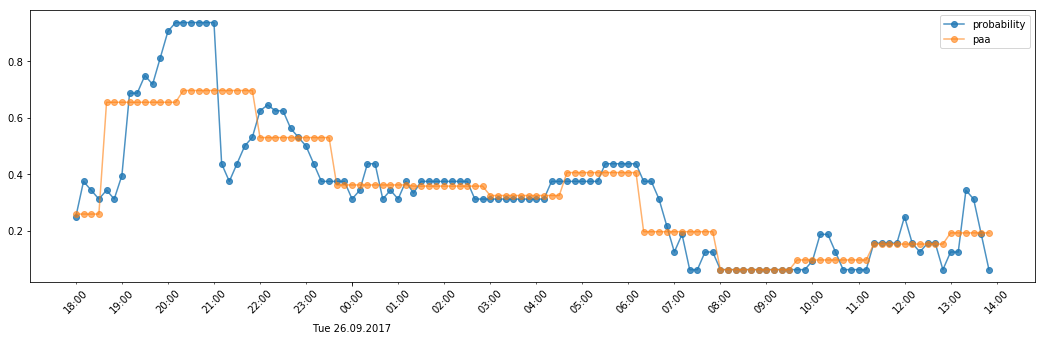

In [92]:
plot_features_station(df_temp_7, station=1001, features_to_plot='paa', nb_row=120, draw_type='-o')

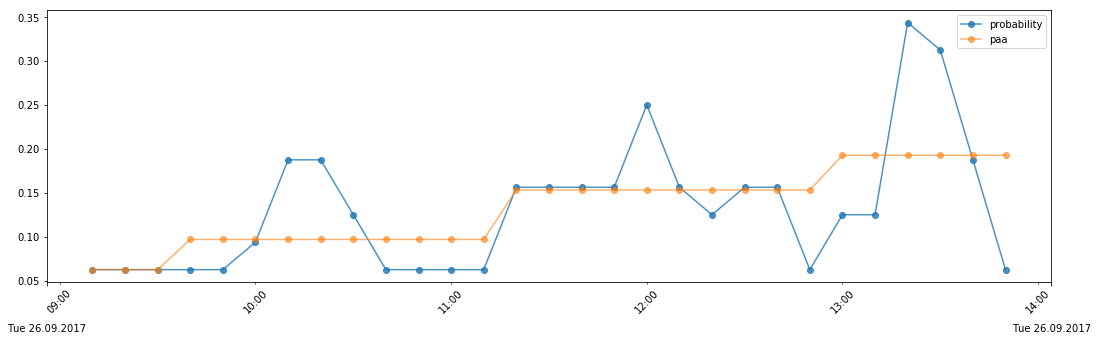

In [101]:
plot_features_station(df_temp_7, station=1001, features_to_plot='paa', nb_row=29, draw_type='-o')

In [98]:
df_temp_7[df_temp_7.station == 1001][['station', 'probability', 'future', 'paa']].tail(15)

,station,probability,future,paa
ts,,,,
2017-09-26 11:30:00,1001,0.15625,0.15625,0.153125
2017-09-26 11:40:00,1001,0.15625,0.15625,0.153125
2017-09-26 11:50:00,1001,0.15625,0.06250,0.153125
2017-09-26 12:00:00,1001,0.25000,0.12500,0.153125
2017-09-26 12:10:00,1001,0.15625,0.12500,0.153125
2017-09-26 12:20:00,1001,0.12500,0.34375,0.153125
2017-09-26 12:30:00,1001,0.15625,0.31250,0.153125
2017-09-26 12:40:00,1001,0.15625,0.18750,0.153125
2017-09-26 12:50:00,1001,0.06250,0.06250,0.153125


In [97]:
df_temp_7[df_temp_7.station == 1001][['station', 'probability', 'future', 'paa']][-26:-16]

,station,probability,future,paa
ts,,,,
2017-09-26 09:40:00,1001,0.06250,0.06250,0.096875
2017-09-26 09:50:00,1001,0.06250,0.06250,0.096875
2017-09-26 10:00:00,1001,0.09375,0.06250,0.096875
2017-09-26 10:10:00,1001,0.18750,0.06250,0.096875
2017-09-26 10:20:00,1001,0.18750,0.15625,0.096875
2017-09-26 10:30:00,1001,0.12500,0.15625,0.096875
2017-09-26 10:40:00,1001,0.06250,0.15625,0.096875
2017-09-26 10:50:00,1001,0.06250,0.15625,0.096875
2017-09-26 11:00:00,1001,0.06250,0.25000,0.096875


In [99]:
df_temp_7[df_temp_7.station == 1001].probability[-26:-16].mean()

0.096875000000000003

There is data leak in this features (PAA). At 09:40, there is a ```probability``` of 0.062 (target is the same one hour later). But PAA is going to mean the next 9 values. So PAA will se the increase in the futur (0.187 / 0.187 / 0.125 - 30 min later) and PAA will be highter. Algorithm will catch it as a win information but can't see it in a production vision.

#### get_sax_transformation

In [102]:
from prediction import get_sax_transformation

In [103]:
df_temp_8 = get_sax_transformation(result.copy(), features_to_compute='probability', segments=10, symbols=8)

In [104]:
df_temp_8[df_temp_8.station == 1001].tail(22)

,station,bikes,stands,is_open,day,hour,minute,probability,is_holiday,public_holiday,public_holiday_count,cluster,station_cluster_geo,future,sax
ts,,,,,,,,,,,,,,,
2017-09-26 10:20:00,1001,3.0,13.0,1.0,1,10,20,0.18750,0,0,0.0,2,5,0.15625,0.100302
2017-09-26 10:30:00,1001,2.0,14.0,1.0,1,10,30,0.12500,0,0,0.0,2,5,0.15625,0.096690
2017-09-26 10:40:00,1001,1.0,15.0,1.0,1,10,40,0.06250,0,0,0.0,2,5,0.15625,0.093077
2017-09-26 10:50:00,1001,1.0,15.0,1.0,1,10,50,0.06250,0,0,0.0,2,5,0.15625,0.089464
2017-09-26 11:00:00,1001,1.0,15.0,1.0,1,11,0,0.06250,0,0,0.0,2,5,0.25000,0.085851
2017-09-26 11:10:00,1001,1.0,15.0,1.0,1,11,10,0.06250,0,0,0.0,2,5,0.15625,0.082238
2017-09-26 11:20:00,1001,2.5,13.5,1.0,1,11,20,0.15625,0,0,0.0,2,5,0.12500,0.180299
2017-09-26 11:30:00,1001,2.5,13.5,1.0,1,11,30,0.15625,0,0,0.0,2,5,0.15625,0.174215
2017-09-26 11:40:00,1001,2.5,13.5,1.0,1,11,40,0.15625,0,0,0.0,2,5,0.15625,0.168130


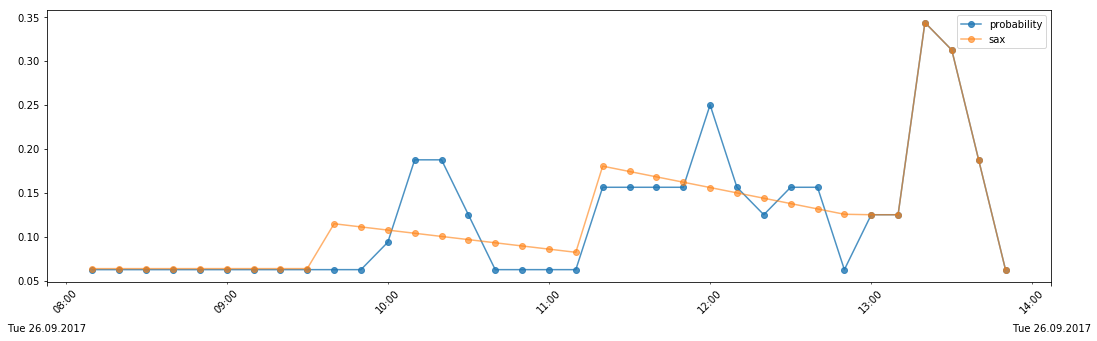

In [105]:
plot_features_station(df_temp_8, station=1001, features_to_plot='sax', nb_row=35, draw_type='-o')

As PAA, SAX transformation give data leak.

#### tranform signal with rolling mean

As PAA & SAX can give data leak, we will mean our probability on x bin (rolling mean)

In [17]:
# Original
result.head()

,station,bikes,stands,is_open,day,hour,minute,probability,future
ts,,,,,,,,,
2017-08-01 02:00:00,1001,11.0,5.0,1.0,1,2,0,0.687500,0.750000
2017-08-01 02:00:00,1002,11.0,11.0,1.0,1,2,0,0.500000,0.348837
2017-08-01 02:00:00,1003,11.0,4.0,1.0,1,2,0,0.733333,0.600000
2017-08-01 02:00:00,1005,1.0,9.0,1.0,1,2,0,0.100000,0.100000
2017-08-01 02:00:00,1006,9.0,13.0,1.0,1,2,0,0.409091,0.409091


In [18]:
from prediction import create_rolling_mean_features

In [19]:
df_temp_9 = create_rolling_mean_features(result, 
                                     features_name='mean_6', 
                                     feature_to_mean='probability', 
                                     features_grp='station', 
                                     nb_shift=6)

In [20]:
df_temp_9[df_temp_9.station == 1001].tail(15)

,station,bikes,stands,is_open,day,hour,minute,probability,future,mean_6
ts,,,,,,,,,,
2017-09-26 11:30:00,1001,2.5,13.5,1.0,1,11,30,0.15625,0.15625,0.093750
2017-09-26 11:40:00,1001,2.5,13.5,1.0,1,11,40,0.15625,0.15625,0.109375
2017-09-26 11:50:00,1001,2.5,13.5,1.0,1,11,50,0.15625,0.06250,0.125000
2017-09-26 12:00:00,1001,4.0,12.0,1.0,1,12,0,0.25000,0.12500,0.156250
2017-09-26 12:10:00,1001,2.5,13.5,1.0,1,12,10,0.15625,0.12500,0.171875
2017-09-26 12:20:00,1001,2.0,14.0,1.0,1,12,20,0.12500,0.34375,0.166667
2017-09-26 12:30:00,1001,2.5,13.5,1.0,1,12,30,0.15625,0.31250,0.166667
2017-09-26 12:40:00,1001,2.5,13.5,1.0,1,12,40,0.15625,0.18750,0.166667
2017-09-26 12:50:00,1001,1.0,15.0,1.0,1,12,50,0.06250,0.06250,0.151042


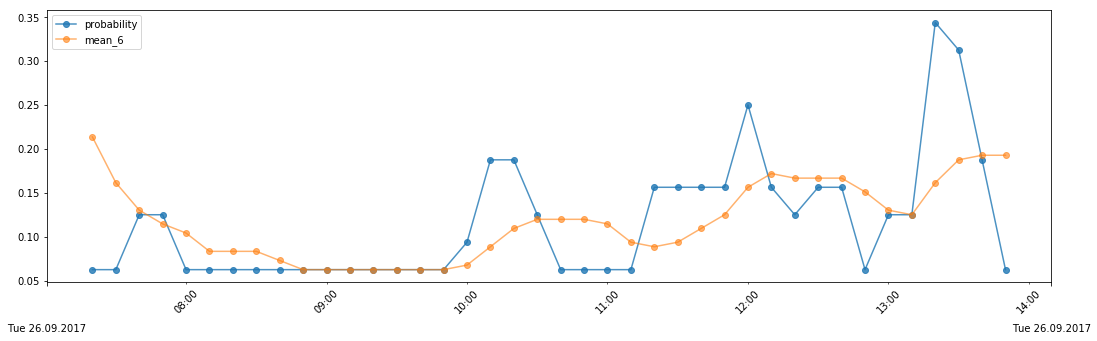

In [33]:
plot_features_station(df_temp_9, station=1001, features_to_plot='mean_6', nb_row=40, draw_type='-o')

Here there is no leak of information in the future. You only take past informations to give context to our algorithm 

#### Rolling Standard Deviation

Sometime station's bike don't move too much, and sometime it's crazy time. By given this indicator, we want to help our algorithm with context awareness

In [22]:
from prediction import create_rolling_std_features

In [23]:
df_temp_10 = create_rolling_std_features(result, 
                                     features_name='std_9', 
                                     feature_to_std='probability', 
                                     features_grp='station', 
                                     nb_shift=9)

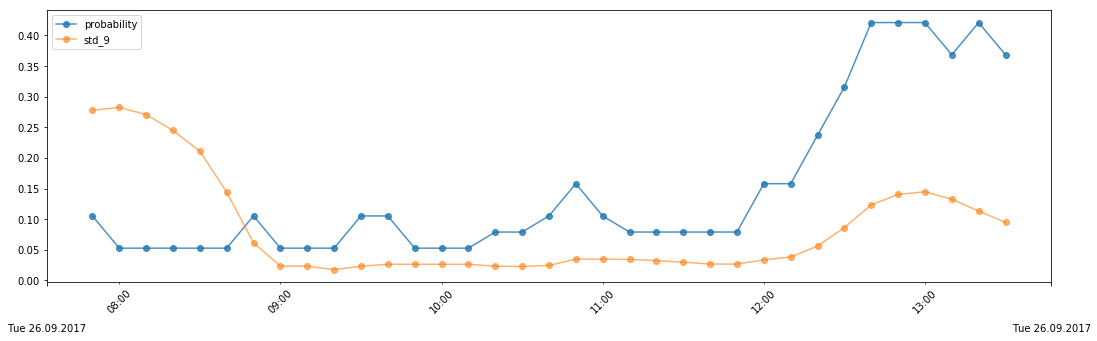

In [24]:
plot_features_station(df_temp_10, station=4012, features_to_plot='std_9', nb_row=35, draw_type='-o')

#### Rolling on median

In [32]:
from prediction import create_rolling_median_features

In [33]:
df_temp_11 = create_rolling_median_features(result, 
                                     features_name='median_6', 
                                     feature_to_median='probability', 
                                     features_grp='station', 
                                     nb_shift=6)

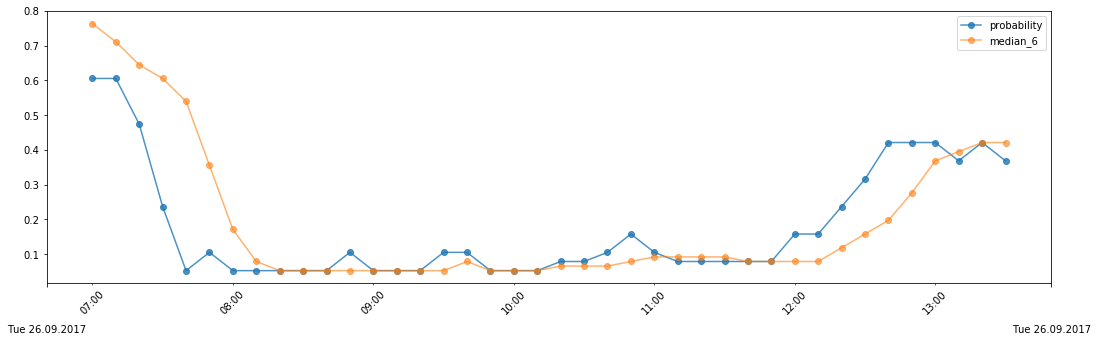

In [34]:
plot_features_station(df_temp_11, station=4012, features_to_plot='median_6', nb_row=40, draw_type='-o')

#### Create bool for pretty empty or full station

In [ ]:
def create_bool_empty_full_station(df):
    """
    Create a bool features "warning_empty_full"
    If bike <= 2 --> 1
    If Proba >= 0.875 --> 1
    else --> 0
    """
    
    df['warning_empty_full'] = 0
    df.loc[df['bikes'] <= 2, 'warning_empty_full'] = 1
    df.loc[df['probability'] >= 0.875, 'warning_empty_full'] = 1
    
    return df

In [47]:
df_temp_12 = result.copy()

In [48]:
df_temp_12.head()

,station,bikes,stands,is_open,day,hour,minute,probability,is_holiday,public_holiday,public_holiday_count,cluster,station_cluster_geo,hours_binned,future
ts,,,,,,,,,,,,,,,
2017-08-01 02:00:00,1001,11.0,5.0,1.0,1,2,0,0.687500,1,0,0.0,2,5,0.0,0.750000
2017-08-01 02:00:00,1002,11.0,11.0,1.0,1,2,0,0.500000,1,0,0.0,2,5,0.0,0.348837
2017-08-01 02:00:00,1003,11.0,4.0,1.0,1,2,0,0.733333,1,0,0.0,2,5,0.0,0.600000
2017-08-01 02:00:00,1005,1.0,9.0,1.0,1,2,0,0.100000,1,0,0.0,2,5,0.0,0.100000
2017-08-01 02:00:00,1006,9.0,13.0,1.0,1,2,0,0.409091,1,0,0.0,0,5,0.0,0.409091


In [49]:
df_temp_12['warning_empty_full'] = 0
df_temp_12.loc[df_temp_12['bikes'] <= 2, 'warning_empty_full'] = 1
df_temp_12.loc[df_temp_12['probability'] >= 0.875, 'warning_empty_full'] = 1

In [156]:
feature_event_to_plot='warning_empty_full'
features_event_value=1

In [157]:
df_temp_13[df_temp_13[feature_event_to_plot] == features_event_value].head()

,station,bikes,stands,is_open,day,hour,minute,probability,is_holiday,public_holiday,public_holiday_count,cluster,station_cluster_geo,future,warning_empty_full
ts,,,,,,,,,,,,,,,
2017-08-01 02:00:00,1005,1.0,9.0,1.0,1,2,0,0.100000,1,0,0.0,2,5,0.100000,1
2017-08-01 02:00:00,1016,1.0,16.0,1.0,1,2,0,0.058824,1,0,0.0,2,5,0.058824,1
2017-08-01 02:00:00,1020,1.0,17.0,1.0,1,2,0,0.055556,1,0,0.0,2,5,0.055556,1
2017-08-01 02:00:00,1021,2.0,9.0,1.0,1,2,0,0.181818,1,0,0.0,2,5,0.090909,1
2017-08-01 02:00:00,1022,29.0,2.0,1.0,1,2,0,0.935484,1,0,0.0,2,5,0.903226,1


In [50]:
def plot_event_station(result, station, feature_event_to_plot='bike', features_event_value=1,
                       nb_row=350, point_type='*'):
    """Plot available bikes and bike stands for a given station"""
    
    data = reswult[result.station == station].tail(nb_row).copy()
    
    fig, ax = plt.subplots(figsize=(18,5))
    plt.plot(data.index, data.probability, '-', label='probability', alpha=0.8)
    plt.plot(data[data[feature_event_to_plot] == features_event_value].index, 
            data[data[feature_event_to_plot] == features_event_value].probability,
            point_type, markerfacecolor='k',
            label=feature_event_to_plot, alpha=0.6)
    
    
    ax = plt.gca()
    # set major ticks location every day
    ax.xaxis.set_major_locator(mdates.DayLocator())
    # set major ticks format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('\n\n\n%a %d.%m.%Y'))
    # set minor ticks location every one hours
    ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
    # set minor ticks format
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
    plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)

    plt.legend(loc='best')

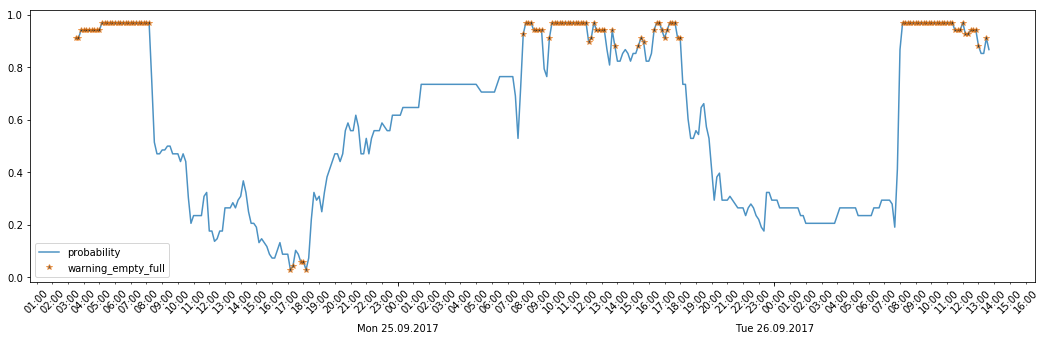

In [64]:
plot_event_station(df_temp_12, station=10101, feature_event_to_plot='warning_empty_full',
                      features_event_value=1, nb_row=350, point_type='*')

## Split learning dataset on train test (avoid data leak feature)

#### The train test split

We split our dataset to create on date :
    - A trainning Dataset
    - A test Dataset

In [40]:
# to have same value
date = predict_date
print ('date : ' + str(date))
cut = date - pd.Timedelta(freq.replace('T', 'm'))
stop = date + periods * pd.Timedelta(freq.replace('T', 'm'))
print ('cut : ' + str(cut))
print ('stop : ' + str(stop))

date : 2017-09-22 09:00:00
cut : 2017-09-22 08:00:00
stop : 2017-09-22 10:00:00


In [41]:
train = result[result.index <= cut].copy()
mask = np.logical_and(result.index >= date, result.index <= stop)
test = result[mask].copy()

In [42]:
print('train shape : ' + str(train.shape))
print('test shape : ' + str(test.shape))

train shape : (2550975, 15)
test shape : (2373, 15)


In [43]:
train.head()

,station,bikes,stands,is_open,day,hour,minute,probability,is_holiday,public_holiday,public_holiday_count,cluster,station_cluster_geo,hours_binned,future
ts,,,,,,,,,,,,,,,
2017-08-01 02:00:00,1001,11.0,5.0,1.0,1,2,0,0.687500,1,0,0.0,2,5,0.0,0.750000
2017-08-01 02:00:00,1002,11.0,11.0,1.0,1,2,0,0.500000,1,0,0.0,2,5,0.0,0.348837
2017-08-01 02:00:00,1003,11.0,4.0,1.0,1,2,0,0.733333,1,0,0.0,2,5,0.0,0.600000
2017-08-01 02:00:00,1005,1.0,9.0,1.0,1,2,0,0.100000,1,0,0.0,2,5,0.0,0.100000
2017-08-01 02:00:00,1006,9.0,13.0,1.0,1,2,0,0.409091,1,0,0.0,0,5,0.0,0.409091


#### Create KPI probability group on binned hour / month / day / is_open ==1

We need to create our binned hours mapping

In [44]:
from prediction import create_mean_by_sta_day_binned_hours

In [45]:
train_temp_1, test_temp_1 = create_mean_by_sta_day_binned_hours(train.copy(), test.copy(), 
                                     features_name='proba_mean_by_sta_day_binned_hour', 
                                     feature_to_mean='probability', 
                                     features_grp=['station', 'day', 'hours_binned'])

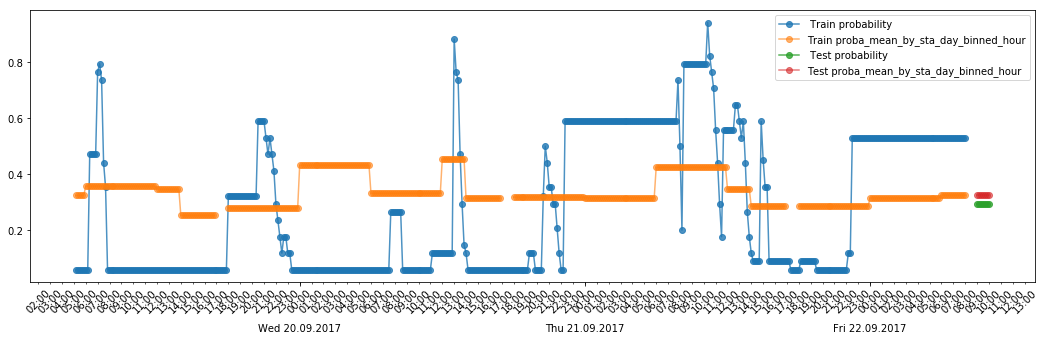

In [60]:
plot_features_station_train_test(train_temp_1, test_temp_1, station=1036, features_to_plot='proba_mean_by_sta_day_binned_hour', 
                      nb_row=450, draw_type='-o')

#### Detect anomalie in probability du to some re stock by humain

In [85]:
df_temp7 = result.copy()
df_temp7['ts'] = df_temp7.index
df_temp7 = df_temp7.sort_values(['station', 'ts'])

In [86]:
df_temp7.head()

,station,bikes,stands,is_open,day,hour,minute,probability,future,ts
ts,,,,,,,,,,
2017-08-01 02:00:00,1001,11.0,5.0,1.0,1,2,0,0.68750,0.7500,2017-08-01 02:00:00
2017-08-01 02:10:00,1001,11.0,5.0,1.0,1,2,10,0.68750,0.6875,2017-08-01 02:10:00
2017-08-01 02:20:00,1001,11.5,4.5,1.0,1,2,20,0.71875,0.6875,2017-08-01 02:20:00
2017-08-01 02:30:00,1001,12.0,4.0,1.0,1,2,30,0.75000,0.6250,2017-08-01 02:30:00
2017-08-01 02:40:00,1001,12.0,4.0,1.0,1,2,40,0.75000,0.6250,2017-08-01 02:40:00


In [87]:

df_temp7['prob_shit'] = df_temp7.groupby(['station'])['probability'].apply(lambda x: x.shift(1))
df_temp7['prob_diff'] = np.abs(df_temp7['prob_shit'] - df_temp7['probability'])

In [89]:
df_temp7.tail()

,station,bikes,stands,is_open,day,hour,minute,probability,future,ts,prob_shit,prob_diff
ts,,,,,,,,,,,,
2017-09-26 13:10:00,12002,2.5,17.5,1.0,1,13,10,0.125,0.1,2017-09-26 13:10:00,0.050,0.075
2017-09-26 13:20:00,12002,3.0,17.0,1.0,1,13,20,0.150,0.1,2017-09-26 13:20:00,0.125,0.025
2017-09-26 13:30:00,12002,3.0,17.0,1.0,1,13,30,0.150,0.1,2017-09-26 13:30:00,0.150,0.000
2017-09-26 13:40:00,12002,3.0,17.0,1.0,1,13,40,0.150,0.1,2017-09-26 13:40:00,0.150,0.000
2017-09-26 13:50:00,12002,2.0,18.0,1.0,1,13,50,0.100,0.1,2017-09-26 13:50:00,0.150,0.050


In [96]:
df_temp7[df_temp7.prob_diff >= 0.5].tail(6)

,station,bikes,stands,is_open,day,hour,minute,probability,future,ts,prob_shit,prob_diff
ts,,,,,,,,,,,,
2017-09-14 08:50:00,11001,12.0,6.0,1.0,3,8,50,0.666667,0.666667,2017-09-14 08:50:00,0.166667,0.500000
2017-09-18 18:00:00,11001,13.0,5.0,1.0,0,18,0,0.722222,0.722222,2017-09-18 18:00:00,0.111111,0.611111
2017-09-25 08:30:00,11001,12.0,5.5,1.0,0,8,30,0.685714,0.685714,2017-09-25 08:30:00,0.055556,0.630159
2017-09-26 08:50:00,11001,12.0,6.0,1.0,1,8,50,0.666667,0.666667,2017-09-26 08:50:00,0.111111,0.555556
2017-08-02 07:50:00,12001,17.0,7.0,1.0,2,7,50,0.708333,0.958333,2017-08-02 07:50:00,0.208333,0.500000
2017-09-19 08:10:00,12001,20.0,5.0,1.0,1,8,10,0.800000,0.800000,2017-09-19 08:10:00,0.240000,0.560000


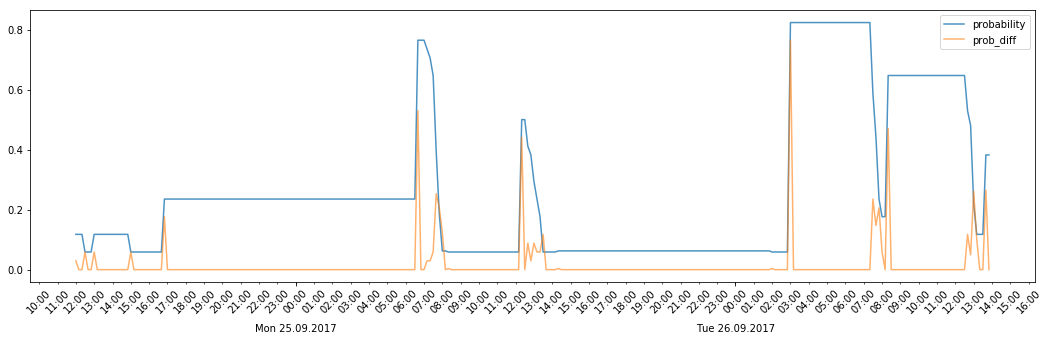

In [113]:
plot_features_station(df_temp7, station=1036, features_to_plot='prob_diff', nb_row=300, draw_type='-')

In [116]:
df_temp7[(df_temp7.station == 1036) & (df_temp7.ts >= '2017-09-26 02:30:00')].head(6)

,station,bikes,stands,is_open,day,hour,minute,probability,future,ts,prob_shit,prob_diff,ano
ts,,,,,,,,,,,,,
2017-09-26 02:30:00,1036,1.0,16.0,1.0,1,2,30,0.058824,0.823529,2017-09-26 02:30:00,0.058824,0.000000,0
2017-09-26 02:40:00,1036,1.0,16.0,1.0,1,2,40,0.058824,0.823529,2017-09-26 02:40:00,0.058824,0.000000,0
2017-09-26 02:50:00,1036,1.0,16.0,1.0,1,2,50,0.058824,0.823529,2017-09-26 02:50:00,0.058824,0.000000,0
2017-09-26 03:00:00,1036,14.0,3.0,1.0,1,3,0,0.823529,0.823529,2017-09-26 03:00:00,0.058824,0.764706,1
2017-09-26 03:10:00,1036,14.0,3.0,1.0,1,3,10,0.823529,0.823529,2017-09-26 03:10:00,0.823529,0.000000,0
2017-09-26 03:20:00,1036,14.0,3.0,1.0,1,3,20,0.823529,0.823529,2017-09-26 03:20:00,0.823529,0.000000,0


In 10 min at 03:00, 13 bikes have been loaded here. It's impossible to predict it as it's bike company who reload this station

In [103]:
df_temp7['ano'] = 0
df_temp7.loc[df_temp7['prob_diff'] > 0.5, 'ano'] = 1

In [112]:
df_temp7[(df_temp7.station == 1036) & (df_temp7['ano']==1)][['prob_diff','day', 'hour', 'minute', 'bikes', 'prob_diff']].tail(50)

,prob_diff,day,hour,minute,bikes,prob_diff
ts,,,,,,
2017-08-10 05:00:00,0.882353,3,5,0,16.000000,0.882353
2017-08-11 09:20:00,0.558824,4,9,20,11.500000,0.558824
2017-08-11 17:00:00,0.647059,4,17,0,13.000000,0.647059
2017-08-11 19:20:00,0.627451,4,19,20,11.666667,0.627451
2017-08-12 13:50:00,0.647059,5,13,50,12.000000,0.647059
2017-08-15 04:40:00,0.647059,1,4,40,12.000000,0.647059
2017-08-15 20:50:00,0.516934,1,20,50,9.500000,0.516934
2017-08-16 11:20:00,0.529412,2,11,20,10.000000,0.529412
2017-08-17 22:20:00,0.529412,3,22,20,11.000000,0.529412


In [108]:
df_temp7[df_temp7['ano']==1].station.value_counts()

1036     62
4017     60
4021     55
4005     39
5007     31
2002     30
5050     29
4002     28
4011     28
5053     24
4014     24
5008     22
4009     21
4022     21
4003     20
2014     18
5047     18
4041     18
3087     16
4006     15
5004     15
2039     13
4025     13
1032     13
11001    12
1001     12
4007     11
1020     11
2008     11
7009     11
         ..
10043     1
12001     1
10039     1
10036     1
10012     1
10018     1
10072     1
10079     1
1013      1
1003      1
10122     1
6020      1
3082      1
10114     1
10111     1
10034     1
3002      1
6012      1
3004      1
6011      1
6007      1
3015      1
3021      1
3029      1
3036      1
10089     1
8039      1
10084     1
10083     1
8061      1
Name: station, Length: 221, dtype: int64

#### Weather feature

Exact weather

In [117]:
lyon_meteo = pd.read_csv('../data/lyon_weather.csv', parse_dates=['date'])
lyon_meteo.rename(columns={'date':'ts'}, inplace=True)

In [118]:
lyon_meteo.head()

,ts,weather_id,weather_desc,temp,temp_min,temp_max,pressure,humidity,wind_speed,cloudiness
0,2017-08-01 00:10:00,800,Clear,26.70,24.0,28.0,1011.0,39,3.1,0
1,2017-08-01 00:20:00,800,Clear,26.22,24.0,27.0,1011.0,39,1.0,0
2,2017-08-01 00:30:00,800,Clear,26.22,24.0,27.0,1011.0,39,1.0,0
3,2017-08-01 00:40:00,800,Clear,26.22,24.0,27.0,1011.0,39,1.0,0
4,2017-08-01 00:50:00,800,Clear,24.72,21.0,27.0,1011.0,44,1.5,0


Forcast weather

In [119]:
lyon_forecast = pd.read_csv('../data/lyon_forecast.csv', parse_dates=['forecast_at', 'ts'])
lyon_forecast['delta'] = lyon_forecast['ts'] - lyon_forecast['forecast_at']

In [123]:
lyon_forecast.tail()

,forecast_at,ts,weather_id,weather_desc,temp,temp_min,temp_max,rain_3h,snow_3h,pressure,humidity,wind_speed,cloudiness,delta
86097,2017-09-30 23:00:00,2017-10-05 11:00:00,500,Rain,10.80,10.80,10.80,0.05,NaN,992.87,85,1.16,44,4 days 12:00:00
86098,2017-09-30 23:00:00,2017-10-05 14:00:00,800,Clear,16.97,16.97,16.97,NaN,NaN,991.37,73,1.76,0,4 days 15:00:00
86099,2017-09-30 23:00:00,2017-10-05 17:00:00,800,Clear,18.87,18.87,18.87,NaN,NaN,989.61,61,1.79,0,4 days 18:00:00
86100,2017-09-30 23:00:00,2017-10-05 20:00:00,800,Clear,11.38,11.38,11.38,NaN,NaN,989.34,89,1.15,0,4 days 21:00:00
86101,2017-09-30 23:00:00,2017-10-05 23:00:00,800,Clear,5.81,5.81,5.81,NaN,NaN,989.78,84,1.07,0,5 days 00:00:00


In [126]:
lyon_forecast[(lyon_forecast.rain_3h >= 1) & (lyon_forecast.delta == '1H')].tail()

,forecast_at,ts,weather_id,weather_desc,temp,temp_min,temp_max,rain_3h,snow_3h,pressure,humidity,wind_speed,cloudiness,delta
70565,2017-09-14 13:00:00,2017-09-14 14:00:00,500,Rain,10.46,10.46,13.77,2.5650,NaN,987.15,92,3.81,100,01:00:00
75061,2017-09-19 07:00:00,2017-09-19 08:00:00,500,Rain,9.77,8.23,9.77,2.1450,NaN,987.43,97,1.77,92,01:00:00
75136,2017-09-19 10:00:00,2017-09-19 11:00:00,500,Rain,13.72,10.04,13.72,1.5275,NaN,988.58,91,2.91,92,01:00:00
85782,2017-09-30 16:00:00,2017-09-30 17:00:00,501,Rain,7.95,7.95,12.82,6.2875,NaN,989.40,98,3.21,92,01:00:00
85902,2017-09-30 19:00:00,2017-09-30 20:00:00,500,Rain,12.06,11.93,12.06,1.7875,NaN,990.36,100,2.11,92,01:00:00


In [127]:
lyon_forecast[(lyon_forecast.ts >= '2017-09-14 14:00:00') & (lyon_forecast.delta == '1H')].head(15)

,forecast_at,ts,weather_id,weather_desc,temp,temp_min,temp_max,rain_3h,snow_3h,pressure,humidity,wind_speed,cloudiness,delta
70565,2017-09-14 13:00:00,2017-09-14 14:00:00,500,Rain,10.46,10.46,13.77,2.565,NaN,987.15,92,3.81,100,01:00:00
70685,2017-09-14 16:00:00,2017-09-14 17:00:00,801,Clouds,17.82,16.66,17.82,NaN,NaN,987.54,65,2.17,20,01:00:00
70805,2017-09-14 19:00:00,2017-09-14 20:00:00,801,Clouds,13.17,13.17,13.31,NaN,NaN,987.19,61,1.76,12,01:00:00
70925,2017-09-14 22:00:00,2017-09-14 23:00:00,800,Clear,5.87,5.87,7.56,NaN,NaN,987.57,83,1.45,0,01:00:00
71045,2017-09-15 01:00:00,2017-09-15 02:00:00,800,Clear,5.12,4.82,5.12,NaN,NaN,986.55,84,1.07,0,01:00:00
71163,2017-09-15 04:00:00,2017-09-15 05:00:00,801,Clouds,4.75,3.45,4.75,NaN,NaN,985.23,86,1.21,12,01:00:00
71278,2017-09-15 07:00:00,2017-09-15 08:00:00,802,Clouds,7.06,4.81,7.06,NaN,NaN,984.25,88,0.46,32,01:00:00
71390,2017-09-15 10:00:00,2017-09-15 11:00:00,801,Clouds,19.68,14.36,19.68,NaN,NaN,984.82,67,1.77,20,01:00:00
71510,2017-09-15 13:00:00,2017-09-15 14:00:00,802,Clouds,17.36,16.07,17.36,NaN,NaN,983.39,57,1.78,48,01:00:00
71630,2017-09-15 16:00:00,2017-09-15 17:00:00,802,Clouds,17.13,15.80,17.13,NaN,NaN,982.20,54,2.07,44,01:00:00
